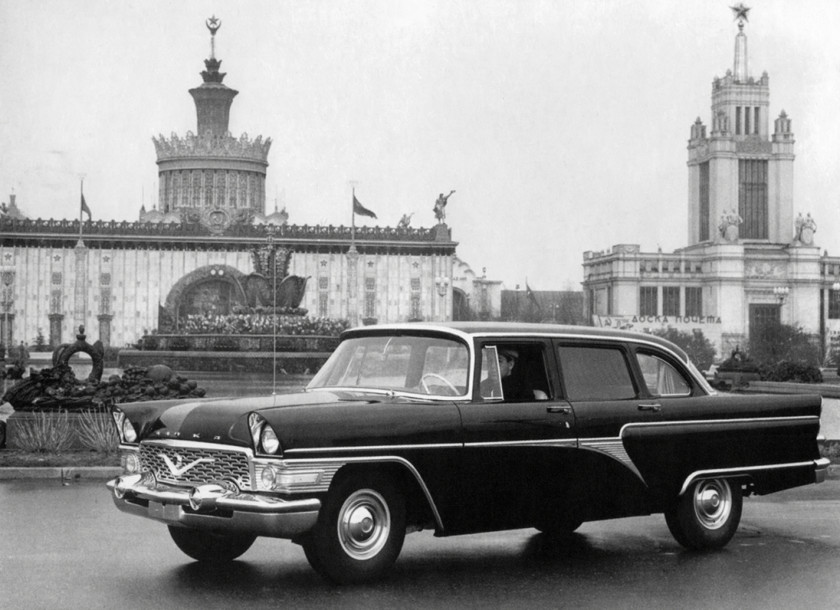

Задача проекта - создать модель, которая будет предсказывать стоимость автомобиля по его характеристикам.  
Заказчик - компания, которая занимается продажей автомобилей с пробегом в Москве.

У нас на руках только тестовая выборка, чтобы понять куда двигаться и какие данные искать, рассмотрим ее подробнее

In [32]:
import pandas as pd
pd.set_option('display.max_rows', 50)  
pd.set_option('display.max_columns', 50)


from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

'''функция для подсчета пропущенных значений и их процента от общего числа значений'''


def missing_table(df):
    mis_val = df.isnull().sum()
    percent = 100 * df.isnull().sum() / len(df)
    mis_table = pd.DataFrame({
        'Missing Values': mis_val,
        '% of Total Values': percent
    })
    return mis_table



'''функция, выводящая графики распределения непрерывных переменных'''


def distplot_num(df):
    for i in num_cols:
        plt.figure()
        sns.distplot(df[i][df[i] > 0].dropna(), kde = False, rug=False)
        plt.title(i)
        plt.show()
        

'''функция, выводящая все уникальные значения и их количество'''
    
    
def cat_values(df, column):
    display(pd.DataFrame(df[column].value_counts(dropna=True)))
    s = sns.catplot(x=column, kind="count", palette="Blues", data=df)
    s.set_xticklabels(rotation=45)

    
'''функция, выводящая график плотности распределения переменных (boxplot)'''


def get_boxplot(df, column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x="default", y=column, data=df, palette="Blues",
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
 

In [35]:
test = pd.read_csv('test.csv')
test.head()

bodyType  brand                                            car_url  \
0  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/octavia/1...   
1  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/octavia/1...   
2  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/superb/11...   
3  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/octavia/1...   
4  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/octavia/1...   

        color                                 complectation_dict  \
0       синий                                                NaN   
1      чёрный                                                NaN   
2       серый  {"id":"20026336","name":"Ambition","available_...   
3  коричневый  {"id":"20803582","name":"Ambition","available_...   
4       белый                                                NaN   

                                         description engineDisplacement  \
0  Все автомобили, представленные в продаже, прох...            1.2 LTR   
1  ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...            1.6 LTR   
2  Все автомобили, представленные в продаже, прох...            1.8 LTR   
3  КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...            1.6 LTR   
4  ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...            1.8 LTR   

  enginePower                                     equipment_dict fuelType  \
0     105 N12  {"engine-proof":true,"tinted-glass":true,"airb...   бензин   
1     110 N12  {"cruise-control":true,"asr":true,"esp":true,"...   бензин   
2     152 N12  {"cruise-control":true,"tinted-glass":true,"es...   бензин   
3     110 N12  {"cruise-control":true,"roller-blind-for-rear-...   бензин   
4     152 N12  {"cruise-control":true,"asr":true,"esp":true,"...   бензин   

                                               image  mileage  modelDate  \
0  https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...    74000       2013   
1  https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...    60563       2017   
2  https://avatars.mds.yandex.net/get-autoru-vos/...    88000       2013   
3  https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...    95000       2013   
4  https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...    58536       2008   

                                          model_info model_name  \
0  {"code":"OCTAVIA","name":"Octavia","ru_name":"...    OCTAVIA   
1  {"code":"OCTAVIA","name":"Octavia","ru_name":"...    OCTAVIA   
2  {"code":"SUPERB","name":"Superb","ru_name":"Су...     SUPERB   
3  {"code":"OCTAVIA","name":"Octavia","ru_name":"...    OCTAVIA   
4  {"code":"OCTAVIA","name":"Octavia","ru_name":"...    OCTAVIA   

                     name  numberOfDoors  parsing_unixtime priceCurrency  \
0      1.2 AMT (105 л.с.)              5        1603226273           RUB   
1       1.6 MT (110 л.с.)              5        1603226277           RUB   
2  DSG 1.8 AMT (152 л.с.)              5        1603226280           RUB   
3       1.6 AT (110 л.с.)              5        1603226284           RUB   
4       1.8 AT (152 л.с.)              5        1603226288           RUB   

   productionDate     sell_id  \
0            2014  1100575026   
1            2017  1100549428   
2            2014  1100658222   
3            2014  1100937408   
4            2012  1101037972   

                                           super_gen     vehicleConfiguration  \
0  {"id":"10373605","displacement":1197,"engine_t...       LIFTBACK ROBOT 1.2   
1  {"id":"20913311","displacement":1598,"engine_t...  LIFTBACK MECHANICAL 1.6   
2  {"id":"20026323","nameplate":"DSG","displaceme...       LIFTBACK ROBOT 1.8   
3  {"id":"20105521","displacement":1598,"engine_t...   LIFTBACK AUTOMATIC 1.6   
4  {"id":"4561004","displacement":1798,"engine_ty...   LIFTBACK AUTOMATIC 1.8   

  vehicleTransmission    vendor    Владельцы Владение       ПТС    Привод  \
0    роботизированная  EUROPEAN  3 или более      NaN  Оригинал  передний   
1        механическая  EUROPEAN   1 владелец      NaN  Оригинал  передний   
2    роботиз

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

In [4]:
missing_table(test)

Missing Values  % of Total Values
bodyType                           0           0.000000
brand                              0           0.000000
car_url                            0           0.000000
color                              0           0.000000
complectation_dict             28268          81.496858
description                        0           0.000000
engineDisplacement                 0           0.000000
enginePower                        0           0.000000
equipment_dict                  9996          28.818544
fuelType                           0           0.000000
image                              0           0.000000
mileage                            0           0.000000
modelDate                          0           0.000000
model_info                         0           0.000000
model_name                         0           0.000000
name                               0           0.000000
numberOfDoors                      0           0.000000
parsing_unixtime                   0           0.000000
priceCurrency                      0           0.000000
productionDate                     0           0.000000
sell_id                            0           0.000000
super_gen                          0           0.000000
vehicleConfiguration               0           0.000000
vehicleTransmission                0           0.000000
vendor                             0           0.000000
Владельцы                          0           0.000000
Владение                       22691          65.418324
ПТС                                1           0.002883
Привод                             0           0.000000
Руль                               0           0.000000
Состояние                          0           0.000000
Таможня                            0           0.000000

В датасете 6 числовых признаков, остальные - dtype object.  
Три признака со значительным количеством пропущенных значений (от 28 до 81%).  
Много столбцов с "грязными" данными  
Проверим есть ли дубликаты по sell_id, что, вероятно, является идентификатором объявления о продаже.

In [5]:
test['sell_id'].nunique() == len(test)

True

Посмотрим на уникальные значения по всему датасету

In [6]:
test.nunique(axis=0)

bodyType                   24
brand                      12
car_url                 34686
color                      16
complectation_dict       2364
description             31732
engineDisplacement         55
enginePower               315
equipment_dict          23705
fuelType                    5
image                   34557
mileage                 11268
modelDate                  66
model_info                954
model_name                544
name                     2780
numberOfDoors               5
parsing_unixtime        34686
priceCurrency               1
productionDate             69
sell_id                 34686
super_gen                5890
vehicleConfiguration      634
vehicleTransmission         4
vendor                      2
Владельцы                   3
Владение                  275
ПТС                         2
Привод                      3
Руль                        2
Состояние                   1
Таможня                     1
dtype: int64

Три признака с единственной категорией: priceCurrency, Состояние, Таможня.  
Рассмотрим содержание признаков с небольшим количеством уникальных значений

## bodyType

In [7]:
test['bodyType'].value_counts()

седан                      13147
внедорожник 5 дв.          12228
лифтбек                     2232
хэтчбек 5 дв.               2124
универсал 5 дв.             1276
минивэн                      995
купе                         824
компактвэн                   489
хэтчбек 3 дв.                485
пикап двойная кабина         280
купе-хардтоп                 158
внедорожник 3 дв.            115
родстер                       99
фургон                        97
кабриолет                     90
седан-хардтоп                 12
микровэн                       7
седан 2 дв.                    6
лимузин                        6
пикап одинарная кабина         5
пикап полуторная кабина        5
внедорожник открытый           3
тарга                          2
фастбек                        1
Name: bodyType, dtype: int64

Видим, что автомобильные кузовы разделены между собой еще и количеством дверей и другими характеристиками.  
Например(я прогуглила), фастбек - это подтип хэтчбека, имеющий покатую форму крыши, плавно, без ступеньки, переходящей в крышку багажника

## brand

brand
BMW          4473
VOLKSWAGEN   4404
NISSAN       4393
MERCEDES     4180
TOYOTA       3913
AUDI         3421
MITSUBISHI   2843
SKODA        2741
VOLVO        1463
HONDA        1150
INFINITI      871
LEXUS         834

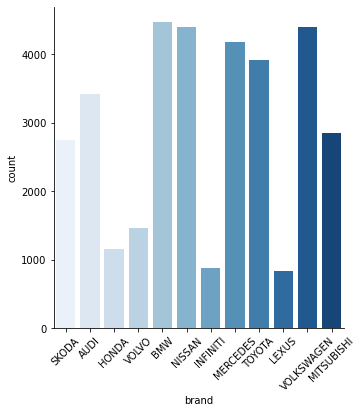

In [8]:
cat_values(test, 'brand')

Тут скорее можно отметить аутсайдеров: VOLVO, HONDA, INFINITI, LEXUS  
И явную тройку лидеров: BMW, VOLKSWAGEN, NISSAN

## color

In [9]:
test['color'].value_counts()

чёрный         11010
белый           6133
серебристый     4113
серый           3984
синий           3289
красный         1531
коричневый      1501
зелёный          952
бежевый          639
голубой          457
золотистый       266
пурпурный        254
фиолетовый       219
жёлтый           194
оранжевый        131
розовый           13
Name: color, dtype: int64

Ожидаемо - самые популярные цвета: черный, белый, серебристый.

## fuelType

fuelType
бензин      28601
дизель       5800
гибрид        223
электро        55
газ             7

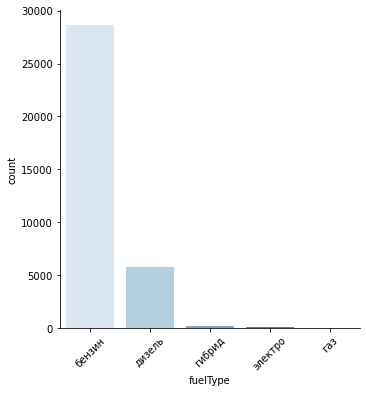

In [10]:
cat_values(test, 'fuelType')

Гибриды и электрокары в явном меньшинстве, впрочем, как и на рынке на рынке новых машин.  
Интересно какие автомобили ездят на газу

In [11]:
test[test['fuelType'] == 'газ'][['brand', 'name']]

brand                        name
24493  VOLKSWAGEN  EcoFuel 1.4 AMT (150 л.с.)
25066  VOLKSWAGEN  EcoFuel 1.4 AMT (150 л.с.)
25468  VOLKSWAGEN  EcoFuel 1.4 AMT (150 л.с.)
25597  VOLKSWAGEN  EcoFuel 1.4 AMT (150 л.с.)
26655  VOLKSWAGEN  EcoFuel 1.4 AMT (150 л.с.)
26660  VOLKSWAGEN  EcoFuel 1.4 AMT (150 л.с.)
30438  VOLKSWAGEN  EcoFuel 1.4 AMT (150 л.с.)

Это одна модель EcoFuel марки VOLKSWAGEN.  Любопытство удовлетворено, идем дальше

# numberOfDoors

numberOfDoors
5          18703
4          14126
2           1206
3            650
0              1

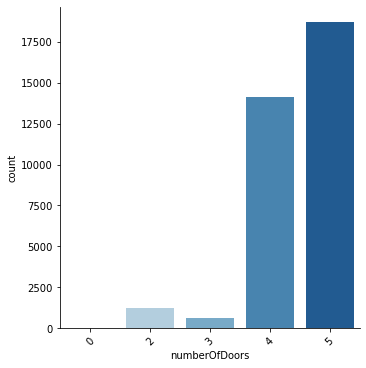

In [12]:
cat_values(test, 'numberOfDoors')

In [13]:
# Тут, видимо, закралась ошибка с количеством дверей, проверим

test[test['numberOfDoors'] == 0]

bodyType     brand                                            car_url  \
16944  кабриолет  MERCEDES  https://auto.ru/cars/used/sale/mercedes/simple...   

       color complectation_dict  \
16944  белый                NaN   

                                             description engineDisplacement  \
16944  на ходу. 1904 год. стоит в гараже, пылится.Кат...            5.3 LTR   

      enginePower equipment_dict fuelType  \
16944      32 N12            NaN   бензин   

                                                   image  mileage  modelDate  \
16944  https://autoru.naydex.net/ESooa9149/468b9eoMem...    48000       1904   

                                              model_info model_name  \
16944  {"code":"SIMPLEX","name":"Simplex","ru_name":"...    SIMPLEX   

                   name  numberOfDoors  parsing_unixtime priceCurrency  \
16944  5.3 MT (32 л.с.)              0        1603245843           RUB   

       productionDate     sell_id  \
16944            1904  1093802104   

                                               super_gen  \
16944  {"id":"21743990","displacement":5322,"engine_t...   

        vehicleConfiguration vehicleTransmission    vendor   Владельцы  \
16944  CABRIO MECHANICAL 5.3        механическая  EUROPEAN  1 владелец   

                Владение       ПТС  Привод    Руль           Состояние  \
16944  6 лет и 8 месяцев  Оригинал  задний  Правый  Не требует ремонта   

          Таможня  
16944  Растаможен

А, нет, действительно была такая модель 1904 года без дверей.  
Интересно, что срок владения этой машиной почти 7 лет, у нее был один владелец, при этом произведена в 1904.  
Аукцион архивных моделей? 1 владелец в России?

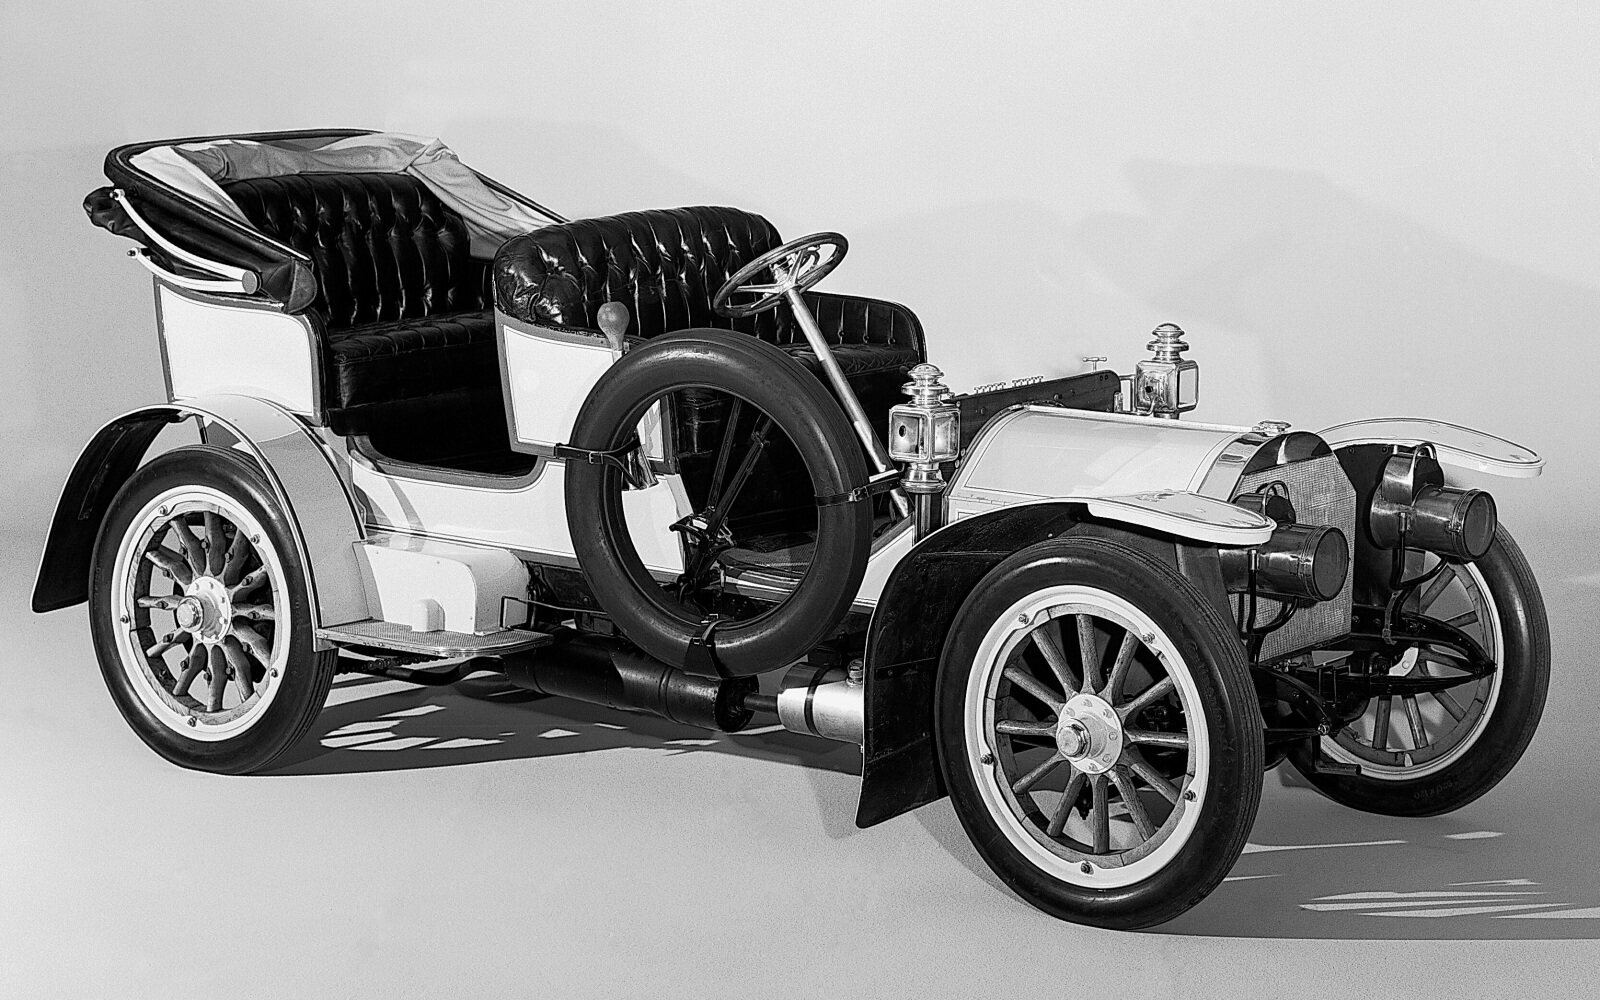

## vehicleTransmission

vehicleTransmission
автоматическая                  19596
механическая                     7209
вариатор                         3999
роботизированная                 3882

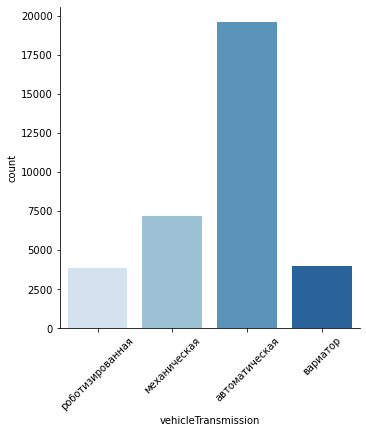

In [14]:
cat_values(test, 'vehicleTransmission')

Автоматическая коробка передач является несомненным лидером на рынке, что неудивительно: в большом городе с частыми пробками это отличный выбор цена-удобство

## vendor

vendor
EUROPEAN   20682
JAPANESE   14004

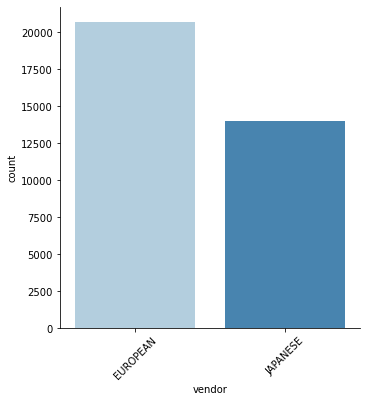

In [15]:
cat_values(test, 'vendor')

В тестовой выборке представлены только европейские и японские производители машин

## Владельцы

Владельцы
3 или более      15957
1 владелец        9459
2 владельца       9270

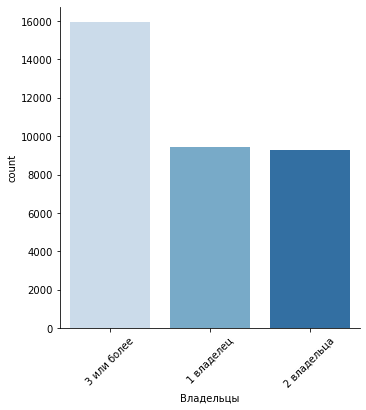

In [16]:
cat_values(test, 'Владельцы')

Выделены три категории по количеству владельцев

## ПТС

ПТС
Оригинал  30098
Дубликат   4587

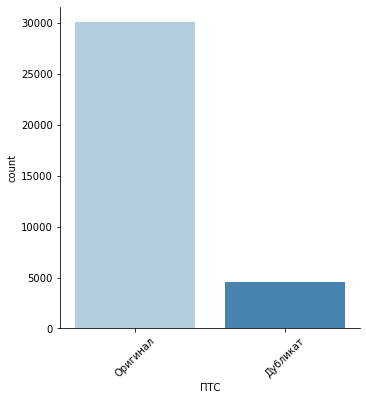

In [17]:
cat_values(test, 'ПТС')

## Привод

Привод
передний   15565
полный     15020
задний      4101

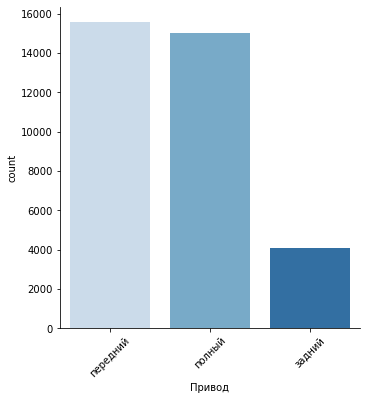

In [18]:
cat_values(test, 'Привод')

## Руль

Руль
Левый   33287
Правый   1399

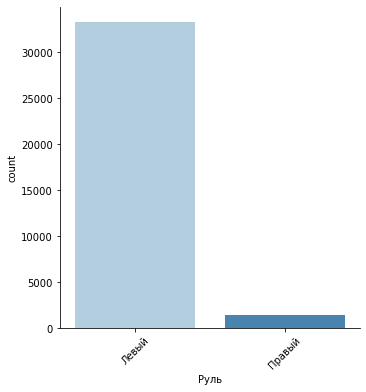

In [19]:
cat_values(test, 'Руль')

Дальше у нас два бинарных признака: Руль и ПТС. С явными лидерами "Левый" и "Оригинал" соответственно.  
И три категории в признаке Привод, с заметным низким присутствием заднего привода.

Приступим к парсингу данных.

In [36]:
test['equipment_dict'] = test['equipment_dict'].fillna('{}')
test['equipment_dict'] = test['equipment_dict'].apply(lambda x: x[1:-1])
test['equipment_dict'] = test['equipment_dict'].apply(lambda x: x.replace(":true", ""))
test['equipment_dict'] = test['equipment_dict'].apply(lambda x: x.split(','))
   
e_list = ['"lock"', '"abs"', '"electro-mirrors"', '"computer"','"airbag-driver"']
   
test['new_equip'] = test['equipment_dict'].apply(lambda x: [a for a in x if a in e_list])
  
test['equipment_dict'] = test['equipment_dict'].apply(lambda x: 0 if x==[''] else 1)

In [37]:
test.head()

bodyType  brand                                            car_url  \
0  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/octavia/1...   
1  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/octavia/1...   
2  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/superb/11...   
3  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/octavia/1...   
4  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/octavia/1...   

        color                                 complectation_dict  \
0       синий                                                NaN   
1      чёрный                                                NaN   
2       серый  {"id":"20026336","name":"Ambition","available_...   
3  коричневый  {"id":"20803582","name":"Ambition","available_...   
4       белый                                                NaN   

                                         description engineDisplacement  \
0  Все автомобили, представленные в продаже, прох...            1.2 LTR   
1  ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...            1.6 LTR   
2  Все автомобили, представленные в продаже, прох...            1.8 LTR   
3  КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...            1.6 LTR   
4  ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...            1.8 LTR   

  enginePower  equipment_dict fuelType  \
0     105 N12               1   бензин   
1     110 N12               1   бензин   
2     152 N12               1   бензин   
3     110 N12               1   бензин   
4     152 N12               1   бензин   

                                               image  mileage  modelDate  \
0  https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...    74000       2013   
1  https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...    60563       2017   
2  https://avatars.mds.yandex.net/get-autoru-vos/...    88000       2013   
3  https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...    95000       2013   
4  https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...    58536       2008   

                                          model_info model_name  \
0  {"code":"OCTAVIA","name":"Octavia","ru_name":"...    OCTAVIA   
1  {"code":"OCTAVIA","name":"Octavia","ru_name":"...    OCTAVIA   
2  {"code":"SUPERB","name":"Superb","ru_name":"Су...     SUPERB   
3  {"code":"OCTAVIA","name":"Octavia","ru_name":"...    OCTAVIA   
4  {"code":"OCTAVIA","name":"Octavia","ru_name":"...    OCTAVIA   

                     name  numberOfDoors  parsing_unixtime priceCurrency  \
0      1.2 AMT (105 л.с.)              5        1603226273           RUB   
1       1.6 MT (110 л.с.)              5        1603226277           RUB   
2  DSG 1.8 AMT (152 л.с.)              5        1603226280           RUB   
3       1.6 AT (110 л.с.)              5        1603226284           RUB   
4       1.8 AT (152 л.с.)              5        1603226288           RUB   

   productionDate     sell_id  \
0            2014  1100575026   
1            2017  1100549428   
2            2014  1100658222   
3            2014  1100937408   
4            2012  1101037972   

                                           super_gen     vehicleConfiguration  \
0  {"id":"10373605","displacement":1197,"engine_t...       LIFTBACK ROBOT 1.2   
1  {"id":"20913311","displacement":1598,"engine_t...  LIFTBACK MECHANICAL 1.6   
2  {"id":"20026323","nameplate":"DSG","displaceme...       LIFTBACK ROBOT 1.8   
3  {"id":"20105521","displacement":1598,"engine_t...   LIFTBACK AUTOMATIC 1.6   
4  {"id":"4561004","displacement":1798,"engine_ty...   LIFTBACK AUTOMATIC 1.8   

  vehicleTransmission    vendor    Владельцы Владение       ПТС    Привод  \
0    роботизированная  EUROPEAN  3 или более      NaN  Оригинал  передний   
1        механическая  EUROPEAN   1 владелец      NaN  Оригинал  передний   
2    роботизированная  EUROPEAN   1 владелец      NaN  Оригинал  передний   
3      автоматическая  EUROPEAN   1 владелец      NaN  Оригинал  передний   
4      автоматическая  EUROPEAN   1 владелец      NaN  Оригинал  пер